In [45]:
import numpy as np
import matplotlib.pyplot as plt

import os
import shutil

from PIL import Image

In [46]:
image_path = "data/leg_data_raw/LAB_AL_x2_val.npy"
ts_path = "data/leg_data_raw/val.ts"

min_image_arr_val = -0.125
max_image_arr_val = 0.75

min_image_img_val = 0
max_image_img_val = 188


In [47]:
def read_ts(ts_path):

    data = []

    with open(ts_path, 'r') as f:
        for line in f:
            data.append( [ float(x.strip()) for x in line.strip().split() ] )

    return np.array(data)

In [48]:
image = np.load(image_path)
ts = read_ts(ts_path)

# Correct dimensions
image = np.transpose(image, (2, 0, 1))

In [49]:
print(f"Image shape: {image.shape}")
print(f"TS shape: {ts.shape}")

Image shape: (180, 537, 221)
TS shape: (180, 18)


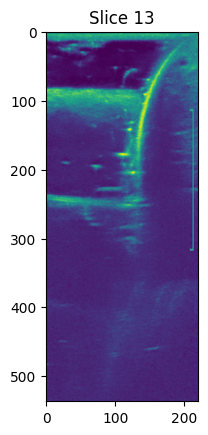

In [50]:
# Visualize a random slice

slice = np.random.randint(0, image.shape[0])

plt.imshow(image[slice])
plt.title(f"Slice {slice}")
plt.show()

In [51]:
print(f"Unique values for the image: {np.unique(image)}")

Unique values for the image: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 19

In [52]:
def ts_to_poses(ts):

    if ts.shape[1] == 18:
        ts = ts[:, :16]

    poses = ts.reshape(-1, 4, 4)
    poses = np.transpose(poses, (0, 2, 1))

    return poses


In [53]:
def normalize(arr):
    arr = arr - np.min(arr)
    arr = arr / np.max(arr)

    return arr

In [54]:
def create_ultranerf_package(path, image, ts):

    if os.path.exists(path):
        shutil.rmtree(path)

    os.makedirs(path)

    poses = ts_to_poses(ts)
    image = normalize(image)
    image = image * (max_image_arr_val - min_image_arr_val) + min_image_arr_val

    np.save(os.path.join(path, "images.npy"), image)
    np.save(os.path.join(path, "poses.npy"), poses)

    os.makedirs(os.path.join(path, "images"))

    image = normalize(image)

    for i in range(image.shape[0]):
        slice = image[i]
        slice = slice * (max_image_img_val - min_image_arr_val) + min_image_img_val
        slice = slice.astype("uint8")

        slice = Image.fromarray(slice)
        slice.save(os.path.join(path, "images", f"{i}.png"))
        

    
    

In [33]:
create_ultranerf_package("leg_ultranerf_val", image, ts)